# 01. 데이터의 확인과 검증셋

In [1]:
import pandas as pd

# 와인 데이터 불러오기
df = pd.read_csv('wine.csv', header=None)

# 데이터를 미리 보기
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 0~11 번째 열에 해당하는 속성 12개를 x 13번째 열을 y로 정하기
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [ ]:
# 학습이 끝난 모델을 테스트해 보는 것이 테스트셋의 목적이라면
# 최적의 학습 파라미터를 찾기 위해 학습 과정에서 사용하는 것은 검증셋
# 검증셋을 설정하면 검증셋에 테스트한 결과를 추적하면서 최적의 모델을 만들 수 있음
# 검증셋은 model.fit() 함수 안에 validation_split 이라는 옵션을 주면 만들어짐

# 전체 코드 실행

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 와인 데이터 불러오기
df = pd.read_csv('wine.csv', header=None)

# 와인의 속성을 X로, 와인의 분류를 y로 저장
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 검증셋 0.8 X 0.25 = 0.2

# 테스트 결과를 출력하기
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 52ms/step - loss: 0.5154 - accuracy: 0.7588 - val_loss: 0.4343 - val_accuracy: 0.7638
Epoch 2/50
8/8 [===

# 02. 모델 업데이트하기
- 에포크(epochs)는 학습을 몇번 반복할지 -> 학습을 많이 반복한다고 모델 성능이 지속적으로 좋아지는것은 아니다 적절히 정해 주는 것이 중요

In [4]:
# 폴더에 모델 지정
modelpath = 'data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [5]:
# 학습 중인 모델을 저장하는 함수 케라스 API ModelCheckpoint()
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [6]:
# 모델을 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, 
                    validation_split=0.25, verbose=0, callbacks=[checkpointer])

# 텍스트 결과를 출력
score = model.evaluate(X_test, y_test)
print(f'Test accuracy : {score[1]}')


Epoch 1: saving model to data/model/all\01-0.9369.hdf5

Epoch 2: saving model to data/model/all\02-0.9362.hdf5


C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to data/model/all\03-0.9292.hdf5

Epoch 4: saving model to data/model/all\04-0.9392.hdf5

Epoch 5: saving model to data/model/all\05-0.9400.hdf5

Epoch 6: saving model to data/model/all\06-0.9415.hdf5

Epoch 7: saving model to data/model/all\07-0.9423.hdf5

Epoch 8: saving model to data/model/all\08-0.9431.hdf5

Epoch 9: saving model to data/model/all\09-0.9431.hdf5

Epoch 10: saving model to data/model/all\10-0.9423.hdf5

Epoch 11: saving model to data/model/all\11-0.9415.hdf5

Epoch 12: saving model to data/model/all\12-0.9415.hdf5

Epoch 13: saving model to data/model/all\13-0.9446.hdf5

Epoch 14: saving model to data/model/all\14-0.9469.hdf5

Epoch 15: saving model to data/model/all\15-0.9500.hdf5

Epoch 16: saving model to data/model/all\16-0.9438.hdf5

Epoch 17: saving model to data/model/all\17-0.9423.hdf5

Epoch 18: saving model to data/model/all\18-0.9423.hdf5

Epoch 19: saving model to data/model/all\19-0.9454.hdf5

Epoch 20: saving model to data/model/

# 03. 그래프로 과적합 확인하기

In [15]:
# 학습셋과 검증셋 오차 비교
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                   validation_split=0.25) # 저장된 history 어떻게 활용할지

Epoch 1/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0562 - val_accuracy: 0.9862
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0516 - val_accuracy: 0.9877
Epoch 3/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.0520 - val_accuracy: 0.9869
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0158 - accuracy: 0.9936 - val_loss: 0.0521 - val_accuracy: 0.9877
Epoch 5/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0157 - accuracy: 0.9941 - val_loss: 0.0518 - val_accuracy: 0.9877
Epoch 6/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0154 - accuracy: 0.9941 - val_loss: 0.0517 - val_accuracy: 0.9869
Epoch 7/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0519 - val_accuracy: 0.9869
Epoch 8/2000


Epoch 59/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 60/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.0517 - val_accuracy: 0.9869
Epoch 61/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0514 - val_accuracy: 0.9869
Epoch 62/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0518 - val_accuracy: 0.9869
Epoch 63/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0519 - val_accuracy: 0.9869
Epoch 64/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0516 - val_accuracy: 0.9869
Epoch 65/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0519 - val_accuracy: 0.9869
Epoch 

8/8 [==============================] - 0s 14ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0529 - val_accuracy: 0.9869
Epoch 117/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0526 - val_accuracy: 0.9869
Epoch 118/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0528 - val_accuracy: 0.9877
Epoch 119/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.0532 - val_accuracy: 0.9869
Epoch 120/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0530 - val_accuracy: 0.9877
Epoch 121/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0533 - val_accuracy: 0.9869
Epoch 122/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0527 - val_accuracy: 0.9877
Epoch 123/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0556 - val_accuracy: 0.9877
Epoch 174/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0559 - val_accuracy: 0.9877
Epoch 175/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0556 - val_accuracy: 0.9877
Epoch 176/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.0553 - val_accuracy: 0.9877
Epoch 177/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0558 - val_accuracy: 0.9877
Epoch 178/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0555 - val_accuracy: 0.9877
Epoch 179/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0549 - val_accuracy: 0.9877
Epoch 180/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0580 - val_accuracy: 0.9877
Epoch 231/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0571 - val_accuracy: 0.9885
Epoch 232/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0579 - val_accuracy: 0.9885
Epoch 233/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0584 - val_accuracy: 0.9885
Epoch 234/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0577 - val_accuracy: 0.9885
Epoch 235/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0580 - val_accuracy: 0.9877
Epoch 236/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0577 - val_accuracy: 0.9877
Epoch 237/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0620 - val_accuracy: 0.9885
Epoch 288/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0618 - val_accuracy: 0.9885
Epoch 289/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0619 - val_accuracy: 0.9885
Epoch 290/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0619 - val_accuracy: 0.9885
Epoch 291/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0624 - val_accuracy: 0.9877
Epoch 292/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0619 - val_accuracy: 0.9885
Epoch 293/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0621 - val_accuracy: 0.9885
Epoch 294/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.0100 - accuracy: 0.9964 - val_loss: 0.0679 - val_accuracy: 0.9885
Epoch 345/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0671 - val_accuracy: 0.9877
Epoch 346/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0686 - val_accuracy: 0.9885
Epoch 347/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0100 - accuracy: 0.9962 - val_loss: 0.0683 - val_accuracy: 0.9877
Epoch 348/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0676 - val_accuracy: 0.9877
Epoch 349/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0096 - accuracy: 0.9964 - val_loss: 0.0678 - val_accuracy: 0.9885
Epoch 350/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0675 - val_accuracy: 0.9877
Epoch 351/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.0693 - val_accuracy: 0.9877
Epoch 402/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0708 - val_accuracy: 0.9885
Epoch 403/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0696 - val_accuracy: 0.9877
Epoch 404/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0697 - val_accuracy: 0.9877
Epoch 405/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0693 - val_accuracy: 0.9877
Epoch 406/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0736 - val_accuracy: 0.9885
Epoch 407/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.0695 - val_accuracy: 0.9877
Epoch 408/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0742 - val_accuracy: 0.9877
Epoch 459/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0091 - accuracy: 0.9964 - val_loss: 0.0748 - val_accuracy: 0.9885
Epoch 460/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0745 - val_accuracy: 0.9877
Epoch 461/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0084 - accuracy: 0.9967 - val_loss: 0.0773 - val_accuracy: 0.9877
Epoch 462/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0722 - val_accuracy: 0.9877
Epoch 463/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0756 - val_accuracy: 0.9885
Epoch 464/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.0770 - val_accuracy: 0.9877
Epoch 465/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0768 - val_accuracy: 0.9877
Epoch 516/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.0771 - val_accuracy: 0.9877
Epoch 517/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0791 - val_accuracy: 0.9877
Epoch 518/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0779 - val_accuracy: 0.9877
Epoch 519/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0074 - accuracy: 0.9969 - val_loss: 0.0809 - val_accuracy: 0.9877
Epoch 520/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0801 - val_accuracy: 0.9877
Epoch 521/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0788 - val_accuracy: 0.9877
Epoch 522/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.0833 - val_accuracy: 0.9885
Epoch 573/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0887 - val_accuracy: 0.9869
Epoch 574/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0865 - val_accuracy: 0.9869
Epoch 575/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0824 - val_accuracy: 0.9877
Epoch 576/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0070 - accuracy: 0.9974 - val_loss: 0.0829 - val_accuracy: 0.9877
Epoch 577/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.0869 - val_accuracy: 0.9877
Epoch 578/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0068 - accuracy: 0.9974 - val_loss: 0.0857 - val_accuracy: 0.9877
Epoch 579/2000

8/8 [==============================] - 0s 13ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0881 - val_accuracy: 0.9877
Epoch 630/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0070 - accuracy: 0.9969 - val_loss: 0.0898 - val_accuracy: 0.9877
Epoch 631/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0914 - val_accuracy: 0.9869
Epoch 632/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0063 - accuracy: 0.9974 - val_loss: 0.0915 - val_accuracy: 0.9877
Epoch 633/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0887 - val_accuracy: 0.9869
Epoch 634/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0064 - accuracy: 0.9974 - val_loss: 0.0899 - val_accuracy: 0.9869
Epoch 635/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0893 - val_accuracy: 0.9869
Epoch 636/2000

8/8 [==============================] - 0s 13ms/step - loss: 0.0064 - accuracy: 0.9972 - val_loss: 0.0930 - val_accuracy: 0.9877
Epoch 687/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.0925 - val_accuracy: 0.9885
Epoch 688/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0927 - val_accuracy: 0.9877
Epoch 689/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0947 - val_accuracy: 0.9877
Epoch 690/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.0929 - val_accuracy: 0.9869
Epoch 691/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0950 - val_accuracy: 0.9877
Epoch 692/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 0.9977 - val_loss: 0.0956 - val_accuracy: 0.9877
Epoch 693/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0980 - val_accuracy: 0.9877
Epoch 744/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.1007 - val_accuracy: 0.9877
Epoch 745/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0961 - val_accuracy: 0.9877
Epoch 746/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.1009 - val_accuracy: 0.9877
Epoch 747/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0980 - val_accuracy: 0.9869
Epoch 748/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0979 - val_accuracy: 0.9877
Epoch 749/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.0977 - val_accuracy: 0.9877
Epoch 750/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - accuracy: 0.9972 - val_loss: 0.1025 - val_accuracy: 0.9877
Epoch 801/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0962 - val_accuracy: 0.9885
Epoch 802/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0109 - accuracy: 0.9956 - val_loss: 0.1053 - val_accuracy: 0.9869
Epoch 803/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.1039 - val_accuracy: 0.9869
Epoch 804/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0151 - accuracy: 0.9933 - val_loss: 0.1046 - val_accuracy: 0.9877
Epoch 805/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0134 - accuracy: 0.9944 - val_loss: 0.1217 - val_accuracy: 0.9854
Epoch 806/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0436 - accuracy: 0.9892 - val_loss: 0.0986 - val_accuracy: 0.9854
Epoch 807/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1101 - val_accuracy: 0.9869
Epoch 858/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1084 - val_accuracy: 0.9869
Epoch 859/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1095 - val_accuracy: 0.9869
Epoch 860/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1096 - val_accuracy: 0.9869
Epoch 861/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.1092 - val_accuracy: 0.9869
Epoch 862/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1062 - val_accuracy: 0.9869
Epoch 863/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1106 - val_accuracy: 0.9869
Epoch 864/2000

8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1145 - val_accuracy: 0.9869
Epoch 915/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1143 - val_accuracy: 0.9869
Epoch 916/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1141 - val_accuracy: 0.9869
Epoch 917/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.1177 - val_accuracy: 0.9869
Epoch 918/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.1092 - val_accuracy: 0.9869
Epoch 919/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 0.1057 - val_accuracy: 0.9862
Epoch 920/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.1152 - val_accuracy: 0.9862
Epoch 921/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.1164 - val_accuracy: 0.9869
Epoch 972/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1183 - val_accuracy: 0.9869
Epoch 973/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.1241 - val_accuracy: 0.9869
Epoch 974/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1205 - val_accuracy: 0.9862
Epoch 975/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1173 - val_accuracy: 0.9869
Epoch 976/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1208 - val_accuracy: 0.9869
Epoch 977/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1179 - val_accuracy: 0.9862
Epoch 978/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1253 - val_accuracy: 0.9862
Epoch 1029/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.1137 - val_accuracy: 0.9862
Epoch 1030/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1225 - val_accuracy: 0.9862
Epoch 1031/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.1188 - val_accuracy: 0.9862
Epoch 1032/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1158 - val_accuracy: 0.9862
Epoch 1033/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.1175 - val_accuracy: 0.9862
Epoch 1034/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.1248 - val_accuracy: 0.9862
Epoch 10

8/8 [==============================] - 0s 13ms/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 0.1096 - val_accuracy: 0.9877
Epoch 1086/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.1095 - val_accuracy: 0.9885
Epoch 1087/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1103 - val_accuracy: 0.9877
Epoch 1088/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.1079 - val_accuracy: 0.9877
Epoch 1089/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0055 - accuracy: 0.9977 - val_loss: 0.1089 - val_accuracy: 0.9877
Epoch 1090/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.1070 - val_accuracy: 0.9885
Epoch 1091/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.1102 - val_accuracy: 0.9877
Epoch 10

8/8 [==============================] - 0s 19ms/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.1115 - val_accuracy: 0.9885
Epoch 1143/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 0.9979 - val_loss: 0.1161 - val_accuracy: 0.9877
Epoch 1144/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0052 - accuracy: 0.9979 - val_loss: 0.1114 - val_accuracy: 0.9885
Epoch 1145/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.1202 - val_accuracy: 0.9877
Epoch 1146/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 0.9977 - val_loss: 0.1134 - val_accuracy: 0.9885
Epoch 1147/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - accuracy: 0.9977 - val_loss: 0.1150 - val_accuracy: 0.9877
Epoch 1148/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.1158 - val_accuracy: 0.9892
Epoch 11

8/8 [==============================] - 0s 12ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.1213 - val_accuracy: 0.9877
Epoch 1200/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0043 - accuracy: 0.9979 - val_loss: 0.1191 - val_accuracy: 0.9877
Epoch 1201/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.1178 - val_accuracy: 0.9885
Epoch 1202/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 0.1221 - val_accuracy: 0.9885
Epoch 1203/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 0.9977 - val_loss: 0.1176 - val_accuracy: 0.9885
Epoch 1204/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.1244 - val_accuracy: 0.9885
Epoch 1205/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0040 - accuracy: 0.9982 - val_loss: 0.1195 - val_accuracy: 0.9885
Epoch 12

8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - accuracy: 0.9977 - val_loss: 0.1206 - val_accuracy: 0.9862
Epoch 1257/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - accuracy: 0.9977 - val_loss: 0.1274 - val_accuracy: 0.9877
Epoch 1258/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - accuracy: 0.9974 - val_loss: 0.1243 - val_accuracy: 0.9869
Epoch 1259/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 0.1257 - val_accuracy: 0.9885
Epoch 1260/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.1247 - val_accuracy: 0.9885
Epoch 1261/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.1257 - val_accuracy: 0.9869
Epoch 1262/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.1288 - val_accuracy: 0.9862
Epoch 12

8/8 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.9979 - val_loss: 0.1272 - val_accuracy: 0.9885
Epoch 1314/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.1279 - val_accuracy: 0.9885
Epoch 1315/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 0.9985 - val_loss: 0.1328 - val_accuracy: 0.9885
Epoch 1316/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - accuracy: 0.9982 - val_loss: 0.1372 - val_accuracy: 0.9862
Epoch 1317/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0034 - accuracy: 0.9982 - val_loss: 0.1310 - val_accuracy: 0.9885
Epoch 1318/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.1362 - val_accuracy: 0.9869
Epoch 1319/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - accuracy: 0.9979 - val_loss: 0.1335 - val_accuracy: 0.9869
Epoch 13

8/8 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 0.9979 - val_loss: 0.1349 - val_accuracy: 0.9877
Epoch 1371/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - accuracy: 0.9979 - val_loss: 0.1462 - val_accuracy: 0.9877
Epoch 1372/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.1301 - val_accuracy: 0.9877
Epoch 1373/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.1326 - val_accuracy: 0.9885
Epoch 1374/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - accuracy: 0.9979 - val_loss: 0.1453 - val_accuracy: 0.9869
Epoch 1375/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.1293 - val_accuracy: 0.9854
Epoch 1376/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0097 - accuracy: 0.9959 - val_loss: 0.1432 - val_accuracy: 0.9869
Epoch 13

8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 0.1363 - val_accuracy: 0.9885
Epoch 1428/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.1360 - val_accuracy: 0.9877
Epoch 1429/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.9979 - val_loss: 0.1368 - val_accuracy: 0.9877
Epoch 1430/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - accuracy: 0.9979 - val_loss: 0.1428 - val_accuracy: 0.9854
Epoch 1431/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.9982 - val_loss: 0.1396 - val_accuracy: 0.9885
Epoch 1432/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.1491 - val_accuracy: 0.9854
Epoch 1433/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - accuracy: 0.9974 - val_loss: 0.1437 - val_accuracy: 0.9885
Epoch 14

8/8 [==============================] - 0s 13ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.1479 - val_accuracy: 0.9869
Epoch 1485/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - accuracy: 0.9982 - val_loss: 0.1467 - val_accuracy: 0.9885
Epoch 1486/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 0.9982 - val_loss: 0.1456 - val_accuracy: 0.9869
Epoch 1487/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.1433 - val_accuracy: 0.9892
Epoch 1488/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.1484 - val_accuracy: 0.9877
Epoch 1489/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.1449 - val_accuracy: 0.9885
Epoch 1490/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 0.9979 - val_loss: 0.1437 - val_accuracy: 0.9885
Epoch 14

8/8 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.9985 - val_loss: 0.1478 - val_accuracy: 0.9877
Epoch 1542/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.1540 - val_accuracy: 0.9885
Epoch 1543/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.1441 - val_accuracy: 0.9877
Epoch 1544/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0039 - accuracy: 0.9979 - val_loss: 0.1507 - val_accuracy: 0.9885
Epoch 1545/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 0.1452 - val_accuracy: 0.9892
Epoch 1546/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0036 - accuracy: 0.9982 - val_loss: 0.1549 - val_accuracy: 0.9877
Epoch 1547/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 0.1557 - val_accuracy: 0.9877
Epoch 15

8/8 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 0.9985 - val_loss: 0.1502 - val_accuracy: 0.9877
Epoch 1599/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1516 - val_accuracy: 0.9869
Epoch 1600/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.1530 - val_accuracy: 0.9877
Epoch 1601/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9985 - val_loss: 0.1528 - val_accuracy: 0.9877
Epoch 1602/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.1547 - val_accuracy: 0.9877
Epoch 1603/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1504 - val_accuracy: 0.9885
Epoch 1604/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1535 - val_accuracy: 0.9892
Epoch 16

8/8 [==============================] - 0s 12ms/step - loss: 0.0139 - accuracy: 0.9946 - val_loss: 0.1571 - val_accuracy: 0.9869
Epoch 1656/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.1507 - val_accuracy: 0.9869
Epoch 1657/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0138 - accuracy: 0.9946 - val_loss: 0.1469 - val_accuracy: 0.9862
Epoch 1658/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.1622 - val_accuracy: 0.9877
Epoch 1659/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0066 - accuracy: 0.9974 - val_loss: 0.1500 - val_accuracy: 0.9885
Epoch 1660/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 0.1478 - val_accuracy: 0.9885
Epoch 1661/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 0.9977 - val_loss: 0.1562 - val_accuracy: 0.9900
Epoch 16

8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.1611 - val_accuracy: 0.9877
Epoch 1713/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 0.1581 - val_accuracy: 0.9877
Epoch 1714/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1585 - val_accuracy: 0.9885
Epoch 1715/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1593 - val_accuracy: 0.9885
Epoch 1716/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.9985 - val_loss: 0.1586 - val_accuracy: 0.9885
Epoch 1717/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.1591 - val_accuracy: 0.9885
Epoch 1718/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - accuracy: 0.9987 - val_loss: 0.1557 - val_accuracy: 0.9885
Epoch 17

8/8 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.1553 - val_accuracy: 0.9869
Epoch 1770/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.9985 - val_loss: 0.1585 - val_accuracy: 0.9869
Epoch 1771/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.1555 - val_accuracy: 0.9877
Epoch 1772/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - accuracy: 0.9982 - val_loss: 0.1606 - val_accuracy: 0.9877
Epoch 1773/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.1550 - val_accuracy: 0.9862
Epoch 1774/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1571 - val_accuracy: 0.9885
Epoch 1775/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - accuracy: 0.9985 - val_loss: 0.1608 - val_accuracy: 0.9885
Epoch 17

8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.1644 - val_accuracy: 0.9877
Epoch 1827/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - accuracy: 0.9987 - val_loss: 0.1741 - val_accuracy: 0.9885
Epoch 1828/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.1634 - val_accuracy: 0.9885
Epoch 1829/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.1687 - val_accuracy: 0.9877
Epoch 1830/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.1660 - val_accuracy: 0.9885
Epoch 1831/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1678 - val_accuracy: 0.9885
Epoch 1832/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.1686 - val_accuracy: 0.9885
Epoch 18

8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 0.9990 - val_loss: 0.1668 - val_accuracy: 0.9877
Epoch 1884/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1718 - val_accuracy: 0.9885
Epoch 1885/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.1682 - val_accuracy: 0.9885
Epoch 1886/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1715 - val_accuracy: 0.9877
Epoch 1887/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1668 - val_accuracy: 0.9892
Epoch 1888/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.1658 - val_accuracy: 0.9885
Epoch 1889/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy: 0.9985 - val_loss: 0.1692 - val_accuracy: 0.9892
Epoch 18

8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.1747 - val_accuracy: 0.9892
Epoch 1941/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1725 - val_accuracy: 0.9885
Epoch 1942/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1759 - val_accuracy: 0.9877
Epoch 1943/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.1746 - val_accuracy: 0.9877
Epoch 1944/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.1759 - val_accuracy: 0.9877
Epoch 1945/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0037 - accuracy: 0.9977 - val_loss: 0.1766 - val_accuracy: 0.9869
Epoch 1946/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.0107 - accuracy: 0.9951 - val_loss: 0.1748 - val_accuracy: 0.9892
Epoch 19

8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.1766 - val_accuracy: 0.9885
Epoch 1998/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1765 - val_accuracy: 0.9885
Epoch 1999/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1817 - val_accuracy: 0.9885
Epoch 2000/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.1754 - val_accuracy: 0.9877


In [16]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.021523,0.993585,0.056157,0.986154
1,0.017802,0.993841,0.051559,0.987692
2,0.016713,0.994098,0.051951,0.986923
3,0.015818,0.993585,0.052077,0.987692
4,0.015704,0.994098,0.051809,0.987692
...,...,...,...,...
1995,0.001567,0.999487,0.178265,0.988462
1996,0.001650,0.999230,0.176621,0.988462
1997,0.001684,0.999487,0.176508,0.988462
1998,0.001657,0.999487,0.181701,0.988462


In [17]:
y_vloss = hist_df['val_loss'] # 검증셋에 적용해 얻은 오차
y_loss = hist_df['loss'] # 학습셋에서 얻은 오차

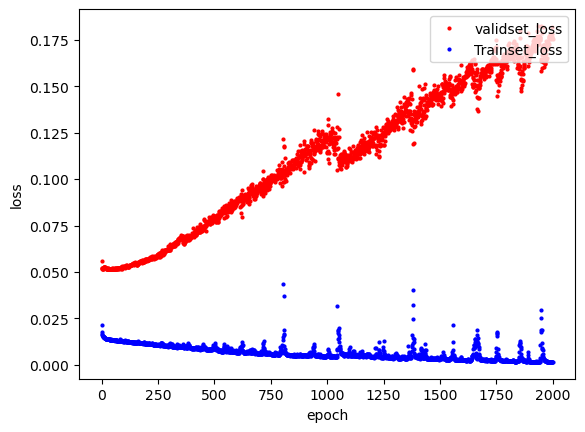

In [19]:
# 그래프로 표시
import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='validset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1778 - val_accuracy: 0.9869
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1794 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1774 - val_accuracy: 0.9885
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1780 - val_accuracy: 0.9885
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1780 - val_accuracy: 0.9885
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1791 - val_accuracy: 0.9885
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1813 - val_accuracy: 0.9885
Epoch 8/2000
8/8 

8/8 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1825 - val_accuracy: 0.9892
Epoch 60/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1852 - val_accuracy: 0.9892
Epoch 61/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.1806 - val_accuracy: 0.9885
Epoch 62/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1875 - val_accuracy: 0.9892
Epoch 63/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.1765 - val_accuracy: 0.9908
Epoch 64/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0025 - accuracy: 0.9987 - val_loss: 0.1869 - val_accuracy: 0.9877
Epoch 65/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 0.1808 - val_accuracy: 0.9908
Epoch 66/2000
8/8 [======

Epoch 117/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1920 - val_accuracy: 0.9892
Epoch 118/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1937 - val_accuracy: 0.9885
Epoch 119/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1932 - val_accuracy: 0.9892
Epoch 120/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1921 - val_accuracy: 0.9885
Epoch 121/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1936 - val_accuracy: 0.9892
Epoch 122/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1916 - val_accuracy: 0.9892
Epoch 123/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1896 - val_accuracy: 0.9885
Epoc

8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1956 - val_accuracy: 0.9885
Epoch 175/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1972 - val_accuracy: 0.9892
Epoch 176/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1970 - val_accuracy: 0.9885
Epoch 177/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1961 - val_accuracy: 0.9885
Epoch 178/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1953 - val_accuracy: 0.9885
Epoch 179/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.1894 - val_accuracy: 0.9892
Epoch 180/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.1952 - val_accuracy: 0.9900
Epoch 181/2000
8/8 [=

Epoch 232/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1784 - val_accuracy: 0.9885
Epoch 233/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1762 - val_accuracy: 0.9885
Epoch 234/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1793 - val_accuracy: 0.9885
Epoch 235/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1787 - val_accuracy: 0.9885
Epoch 236/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1785 - val_accuracy: 0.9885
Epoch 237/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1833 - val_accuracy: 0.9877
Epoch 238/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9990 - val_loss: 0.1822 - val_accuracy: 0.9877
Epoch

8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1907 - val_accuracy: 0.9877
Epoch 290/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1924 - val_accuracy: 0.9885
Epoch 291/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1908 - val_accuracy: 0.9877
Epoch 292/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1933 - val_accuracy: 0.9885
Epoch 293/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1929 - val_accuracy: 0.9877
Epoch 294/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1928 - val_accuracy: 0.9885
Epoch 295/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1918 - val_accuracy: 0.9877
Epoch 296/2000
8/8 [

Epoch 347/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1956 - val_accuracy: 0.9885
Epoch 348/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1975 - val_accuracy: 0.9885
Epoch 349/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1964 - val_accuracy: 0.9885
Epoch 350/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1964 - val_accuracy: 0.9877
Epoch 351/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1944 - val_accuracy: 0.9877
Epoch 352/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1963 - val_accuracy: 0.9885
Epoch 353/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1953 - val_accuracy: 0.9885
Epoch 

8/8 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1934 - val_accuracy: 0.9892
Epoch 405/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1929 - val_accuracy: 0.9892
Epoch 406/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1914 - val_accuracy: 0.9885
Epoch 407/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1918 - val_accuracy: 0.9877
Epoch 408/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1934 - val_accuracy: 0.9885
Epoch 409/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1917 - val_accuracy: 0.9885
Epoch 410/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1975 - val_accuracy: 0.9892
Epoch 411/2000
8/8 

Epoch 462/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2028 - val_accuracy: 0.9885
Epoch 463/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.2008 - val_accuracy: 0.9900
Epoch 464/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.2014 - val_accuracy: 0.9885
Epoch 465/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.1960 - val_accuracy: 0.9900
Epoch 466/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.2107 - val_accuracy: 0.9892
Epoch 467/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1810 - val_accuracy: 0.9877
Epoch 468/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.1814 - val_accuracy: 0.9838
Epoch

8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1977 - val_accuracy: 0.9885
Epoch 520/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1984 - val_accuracy: 0.9885
Epoch 521/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1978 - val_accuracy: 0.9885
Epoch 522/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1981 - val_accuracy: 0.9885
Epoch 523/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1981 - val_accuracy: 0.9885
Epoch 524/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1968 - val_accuracy: 0.9885
Epoch 525/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.2011 - val_accuracy: 0.9877
Epoch 526/2000
8/8 

Epoch 577/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2008 - val_accuracy: 0.9885
Epoch 578/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2004 - val_accuracy: 0.9885
Epoch 579/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2005 - val_accuracy: 0.9885
Epoch 580/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2018 - val_accuracy: 0.9892
Epoch 581/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1989 - val_accuracy: 0.9885
Epoch 582/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2011 - val_accuracy: 0.9885
Epoch 583/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2019 - val_accuracy: 0.9885
Epoch

8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2027 - val_accuracy: 0.9885
Epoch 635/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2030 - val_accuracy: 0.9885
Epoch 636/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2037 - val_accuracy: 0.9885
Epoch 637/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2049 - val_accuracy: 0.9885
Epoch 638/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2066 - val_accuracy: 0.9885
Epoch 639/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2077 - val_accuracy: 0.9885
Epoch 640/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9990 - val_loss: 0.2014 - val_accuracy: 0.9885
Epoch 641/2000
8/

Epoch 692/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 0.9990 - val_loss: 0.2078 - val_accuracy: 0.9885
Epoch 693/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.9967 - val_loss: 0.2500 - val_accuracy: 0.9869
Epoch 694/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.2334 - val_accuracy: 0.9885
Epoch 695/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 0.9920 - val_loss: 0.2048 - val_accuracy: 0.9808
Epoch 696/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0306 - accuracy: 0.9913 - val_loss: 0.1935 - val_accuracy: 0.9831
Epoch 697/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.1734 - val_accuracy: 0.9792
Epoch 698/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.1701 - val_accuracy: 0.9862
Epoc

8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 0.1956 - val_accuracy: 0.9900
Epoch 750/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.2029 - val_accuracy: 0.9900
Epoch 751/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.1974 - val_accuracy: 0.9885
Epoch 752/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1965 - val_accuracy: 0.9892
Epoch 753/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.2003 - val_accuracy: 0.9892
Epoch 754/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1976 - val_accuracy: 0.9892
Epoch 755/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1980 - val_accuracy: 0.9892
Epoch 756/2000
8/8 [

Epoch 807/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2044 - val_accuracy: 0.9892
Epoch 808/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2055 - val_accuracy: 0.9892
Epoch 809/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2084 - val_accuracy: 0.9900
Epoch 810/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2085 - val_accuracy: 0.9892
Epoch 811/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2103 - val_accuracy: 0.9892
Epoch 812/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2064 - val_accuracy: 0.9892
Epoch 813/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2067 - val_accuracy: 0.9885
E

8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1988 - val_accuracy: 0.9892
Epoch 865/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.1999 - val_accuracy: 0.9892
Epoch 866/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.1997 - val_accuracy: 0.9892
Epoch 867/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 0.1999 - val_accuracy: 0.9892
Epoch 868/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2024 - val_accuracy: 0.9892
Epoch 869/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2004 - val_accuracy: 0.9892
Epoch 870/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2013 - val_accuracy: 0.9892
Epoch 871/2000
8/8 [

Epoch 922/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2045 - val_accuracy: 0.9892
Epoch 923/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2025 - val_accuracy: 0.9885
Epoch 924/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2035 - val_accuracy: 0.9892
Epoch 925/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2037 - val_accuracy: 0.9892
Epoch 926/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2027 - val_accuracy: 0.9885
Epoch 927/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2088 - val_accuracy: 0.9892
Epoch 928/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.2032 - val_accuracy: 0.9877
Epoch

8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2051 - val_accuracy: 0.9892
Epoch 980/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2104 - val_accuracy: 0.9900
Epoch 981/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2077 - val_accuracy: 0.9892
Epoch 982/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2082 - val_accuracy: 0.9892
Epoch 983/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2090 - val_accuracy: 0.9892
Epoch 984/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2089 - val_accuracy: 0.9892
Epoch 985/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2071 - val_accuracy: 0.9885
Epoch 986/2000
8/8 

8/8 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1773 - val_accuracy: 0.9877
Epoch 1037/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.1766 - val_accuracy: 0.9885
Epoch 1038/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1796 - val_accuracy: 0.9885
Epoch 1039/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1830 - val_accuracy: 0.9885
Epoch 1040/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1810 - val_accuracy: 0.9885
Epoch 1041/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1822 - val_accuracy: 0.9885
Epoch 1042/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1838 - val_accuracy: 0.9885
Epoch 1043/200

8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2045 - val_accuracy: 0.9900
Epoch 1094/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2051 - val_accuracy: 0.9900
Epoch 1095/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2030 - val_accuracy: 0.9900
Epoch 1096/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2055 - val_accuracy: 0.9908
Epoch 1097/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2034 - val_accuracy: 0.9900
Epoch 1098/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2047 - val_accuracy: 0.9900
Epoch 1099/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2062 - val_accuracy: 0.9900
Epoch 1100/2

8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2095 - val_accuracy: 0.9892
Epoch 1151/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2079 - val_accuracy: 0.9885
Epoch 1152/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2143 - val_accuracy: 0.9885
Epoch 1153/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2136 - val_accuracy: 0.9885
Epoch 1154/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.2125 - val_accuracy: 0.9885
Epoch 1155/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2133 - val_accuracy: 0.9885
Epoch 1156/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2128 - val_accuracy: 0.9892
Epoch 1157/200

8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.2101 - val_accuracy: 0.9892
Epoch 1208/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.2034 - val_accuracy: 0.9892
Epoch 1209/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2092 - val_accuracy: 0.9885
Epoch 1210/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 0.2108 - val_accuracy: 0.9892
Epoch 1211/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2144 - val_accuracy: 0.9892
Epoch 1212/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9992 - val_loss: 0.2083 - val_accuracy: 0.9885
Epoch 1213/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.2107 - val_accuracy: 0.9900
Epoch 1214/2000

8/8 [==============================] - 0s 12ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.1970 - val_accuracy: 0.9892
Epoch 1265/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.1952 - val_accuracy: 0.9869
Epoch 1266/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.1992 - val_accuracy: 0.9885
Epoch 1267/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.2031 - val_accuracy: 0.9892
Epoch 1268/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2105 - val_accuracy: 0.9885
Epoch 1269/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.2056 - val_accuracy: 0.9892
Epoch 1270/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2064 - val_accuracy: 0.9892
Epoch 1271

8/8 [==============================] - 0s 9ms/step - loss: 9.8880e-04 - accuracy: 0.9997 - val_loss: 0.2153 - val_accuracy: 0.9892
Epoch 1321/2000
8/8 [==============================] - 0s 8ms/step - loss: 9.9208e-04 - accuracy: 0.9997 - val_loss: 0.2151 - val_accuracy: 0.9892
Epoch 1322/2000
8/8 [==============================] - 0s 10ms/step - loss: 9.7978e-04 - accuracy: 0.9997 - val_loss: 0.2154 - val_accuracy: 0.9892
Epoch 1323/2000
8/8 [==============================] - 0s 9ms/step - loss: 9.9680e-04 - accuracy: 0.9997 - val_loss: 0.2168 - val_accuracy: 0.9892
Epoch 1324/2000
8/8 [==============================] - 0s 9ms/step - loss: 9.5704e-04 - accuracy: 0.9997 - val_loss: 0.2155 - val_accuracy: 0.9892
Epoch 1325/2000
8/8 [==============================] - 0s 9ms/step - loss: 9.7474e-04 - accuracy: 0.9997 - val_loss: 0.2171 - val_accuracy: 0.9900
Epoch 1326/2000
8/8 [==============================] - 0s 8ms/step - loss: 9.6586e-04 - accuracy: 0.9997 - val_loss: 0.2178 - val_acc

Epoch 1377/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.2243 - val_accuracy: 0.9885
Epoch 1378/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.9990 - val_loss: 0.2073 - val_accuracy: 0.9877
Epoch 1379/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 0.2055 - val_accuracy: 0.9892
Epoch 1380/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 0.9969 - val_loss: 0.2164 - val_accuracy: 0.9892
Epoch 1381/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.2007 - val_accuracy: 0.9877
Epoch 1382/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.2379 - val_accuracy: 0.9885
Epoch 1383/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0201 - accuracy: 0.9944 - val_loss: 0.2071 - val_accuracy: 0.

8/8 [==============================] - 0s 9ms/step - loss: 9.5625e-04 - accuracy: 0.9997 - val_loss: 0.2053 - val_accuracy: 0.9885
Epoch 1434/2000
8/8 [==============================] - 0s 8ms/step - loss: 9.4693e-04 - accuracy: 0.9997 - val_loss: 0.2107 - val_accuracy: 0.9892
Epoch 1435/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2096 - val_accuracy: 0.9892
Epoch 1436/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2033 - val_accuracy: 0.9877
Epoch 1437/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 0.2091 - val_accuracy: 0.9892
Epoch 1438/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2107 - val_accuracy: 0.9885
Epoch 1439/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2105 - val_accuracy: 0.9885
Epoch 

Epoch 1489/2000
8/8 [==============================] - 0s 13ms/step - loss: 9.5948e-04 - accuracy: 0.9997 - val_loss: 0.2159 - val_accuracy: 0.9892
Epoch 1490/2000
8/8 [==============================] - 0s 14ms/step - loss: 9.4418e-04 - accuracy: 0.9997 - val_loss: 0.2181 - val_accuracy: 0.9900
Epoch 1491/2000
8/8 [==============================] - 0s 10ms/step - loss: 9.1981e-04 - accuracy: 0.9997 - val_loss: 0.2164 - val_accuracy: 0.9900
Epoch 1492/2000
8/8 [==============================] - 0s 9ms/step - loss: 9.1454e-04 - accuracy: 0.9997 - val_loss: 0.2181 - val_accuracy: 0.9900
Epoch 1493/2000
8/8 [==============================] - 0s 9ms/step - loss: 9.2099e-04 - accuracy: 0.9997 - val_loss: 0.2175 - val_accuracy: 0.9900
Epoch 1494/2000
8/8 [==============================] - 0s 10ms/step - loss: 9.4033e-04 - accuracy: 0.9997 - val_loss: 0.2174 - val_accuracy: 0.9892
Epoch 1495/2000
8/8 [==============================] - 0s 12ms/step - loss: 9.3604e-04 - accuracy: 0.9997 - val_lo

8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2047 - val_accuracy: 0.9877
Epoch 1546/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2100 - val_accuracy: 0.9892
Epoch 1547/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2049 - val_accuracy: 0.9885
Epoch 1548/2000
8/8 [==============================] - 0s 8ms/step - loss: 8.7532e-04 - accuracy: 0.9997 - val_loss: 0.2092 - val_accuracy: 0.9892
Epoch 1549/2000
8/8 [==============================] - 0s 8ms/step - loss: 8.8035e-04 - accuracy: 0.9997 - val_loss: 0.2092 - val_accuracy: 0.9892
Epoch 1550/2000
8/8 [==============================] - 0s 9ms/step - loss: 8.7616e-04 - accuracy: 0.9997 - val_loss: 0.2120 - val_accuracy: 0.9892
Epoch 1551/2000
8/8 [==============================] - 0s 8ms/step - loss: 8.8112e-04 - accuracy: 0.9997 - val_loss: 0.2131 - val_accuracy: 0.9892

Epoch 1602/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2156 - val_accuracy: 0.9885
Epoch 1603/2000
8/8 [==============================] - 0s 7ms/step - loss: 9.5250e-04 - accuracy: 0.9997 - val_loss: 0.2136 - val_accuracy: 0.9877
Epoch 1604/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2126 - val_accuracy: 0.9877
Epoch 1605/2000
8/8 [==============================] - 0s 5ms/step - loss: 9.0724e-04 - accuracy: 0.9997 - val_loss: 0.2176 - val_accuracy: 0.9892
Epoch 1606/2000
8/8 [==============================] - 0s 7ms/step - loss: 9.6353e-04 - accuracy: 0.9997 - val_loss: 0.2142 - val_accuracy: 0.9885
Epoch 1607/2000
8/8 [==============================] - 0s 7ms/step - loss: 9.2878e-04 - accuracy: 0.9997 - val_loss: 0.2123 - val_accuracy: 0.9877
Epoch 1608/2000
8/8 [==============================] - 0s 8ms/step - loss: 9.0023e-04 - accuracy: 0.9997 - val_loss: 0.2158 -

Epoch 1658/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.2043 - val_accuracy: 0.9892
Epoch 1659/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 0.2305 - val_accuracy: 0.9900
Epoch 1660/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 0.2064 - val_accuracy: 0.9877
Epoch 1661/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.2070 - val_accuracy: 0.9900
Epoch 1662/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.1982 - val_accuracy: 0.9862
Epoch 1663/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 0.9982 - val_loss: 0.2251 - val_accuracy: 0.9877
Epoch 1664/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.2006 - val_accuracy: 0.990

8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.1948 - val_accuracy: 0.9892
Epoch 1716/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.1946 - val_accuracy: 0.9892
Epoch 1717/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1981 - val_accuracy: 0.9892
Epoch 1718/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1926 - val_accuracy: 0.9877
Epoch 1719/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.1949 - val_accuracy: 0.9885
Epoch 1720/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1938 - val_accuracy: 0.9885
Epoch 1721/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1941 - val_accuracy: 0.9885
Epoch 1722/2000

8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1944 - val_accuracy: 0.9885
Epoch 1773/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1966 - val_accuracy: 0.9892
Epoch 1774/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1927 - val_accuracy: 0.9877
Epoch 1775/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1969 - val_accuracy: 0.9892
Epoch 1776/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.1896 - val_accuracy: 0.9885
Epoch 1777/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.9987 - val_loss: 0.2020 - val_accuracy: 0.9892
Epoch 1778/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1914 - val_accuracy: 0.9892
Epoch 1779/200

8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2033 - val_accuracy: 0.9885
Epoch 1830/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2035 - val_accuracy: 0.9885
Epoch 1831/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1988 - val_accuracy: 0.9885
Epoch 1832/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.2013 - val_accuracy: 0.9885
Epoch 1833/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1988 - val_accuracy: 0.9885
Epoch 1834/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.2004 - val_accuracy: 0.9892
Epoch 1835/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1989 - val_accuracy: 0.9885
Epoch 1836

8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2055 - val_accuracy: 0.9892
Epoch 1887/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2043 - val_accuracy: 0.9885
Epoch 1888/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2080 - val_accuracy: 0.9892
Epoch 1889/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.2014 - val_accuracy: 0.9885
Epoch 1890/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2074 - val_accuracy: 0.9892
Epoch 1891/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.2015 - val_accuracy: 0.9885
Epoch 1892/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.2086 - val_accuracy: 0.9892
Epoch 1893/20

8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2069 - val_accuracy: 0.9892
Epoch 1944/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.2075 - val_accuracy: 0.9892
Epoch 1945/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2067 - val_accuracy: 0.9892
Epoch 1946/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2103 - val_accuracy: 0.9892
Epoch 1947/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2071 - val_accuracy: 0.9892
Epoch 1948/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2066 - val_accuracy: 0.9892
Epoch 1949/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.2061 - val_accuracy: 0.9892
Epoch 1950/2

8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1969 - val_accuracy: 0.9885


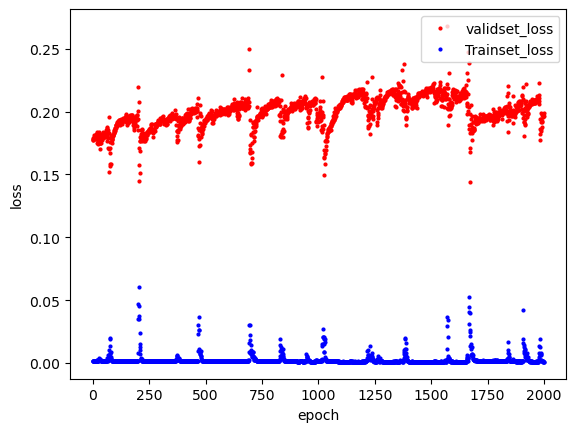

In [20]:
# 그래프 확인을 위한 긴 학습(컴퓨터 환경에 따라 시간이 다소 걸릴 수 있다.)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                   validation_split=0.25)

# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df

# y_vloss에 검증셋의 오차를 저장합니다.
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 검증셋의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='validset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 04. 학습의 자동 중단
- 텐서플로에 포함된 케라스 API는 EarlyStopping() 함수 제공
- 학습이 진행되어도 검증셋의 오차가 줄어들지 않으면 학습을 자동으로 멈추게 하는 함수

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
# monitor 옵션 : 실행 결과 중 어떤 것을 이용할지
# patience 옵션 : 지정된 값이 몇 번 이상 향상되지 않으면 학습을 종료
# 예를들어 위에 코드 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료

In [22]:
modelpath = 'data/model/bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose = 0, save_best_only = True)

In [23]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split = 0.25, verbose = 1,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1988 - val_accuracy: 0.9877
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1988 - val_accuracy: 0.9885
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1992 - val_accuracy: 0.9885


C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1983 - val_accuracy: 0.9877
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1987 - val_accuracy: 0.9877
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1998 - val_accuracy: 0.9877
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1999 - val_accuracy: 0.9885
Epoch 8/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1999 - val_accuracy: 0.9877
Epoch 9/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2021 - val_accuracy: 0.9885
Epoch 10/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1996 - val_accuracy: 0.9877
Epoch 11/2000
8/

In [24]:
# 새로운 코드를 불러와 덧붙여 실행하기
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 학습이 언제 자동 중단될지 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델 이름을 정합니다.
modelpath = 'data/model/bestmodel.hdf5'

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose = 0, save_best_only=True)

# 모델을 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                   validation_split=0.25, verbose=1,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2022 - val_accuracy: 0.9892
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2034 - val_accuracy: 0.9892
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2023 - val_accuracy: 0.9885
Epoch 4/2000


C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2027 - val_accuracy: 0.9892
Epoch 5/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.2040 - val_accuracy: 0.9892
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2041 - val_accuracy: 0.9885
Epoch 7/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2041 - val_accuracy: 0.9885
Epoch 8/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2055 - val_accuracy: 0.9892
Epoch 9/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2020 - val_accuracy: 0.9892
Epoch 10/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2041 - val_accuracy: 0.9892
Epoch 11/2000
8/8 [========

In [25]:
# 만든 모델 테스트
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}') # 실행결과를 보면 조기종료 한것을 확인가능

41/41 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9892
Test accuracy: 0.989230751991272
